In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

# Problem Statement 
Use Random Forest to prepare a model on fraud data  

In [2]:
# Importing Data 

In [3]:
df = pd.read_csv("E:\Data Science\Assignments\Random Forest\Fraud_check.csv")

In [4]:
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
# Checking Outliers 

<Axes: >

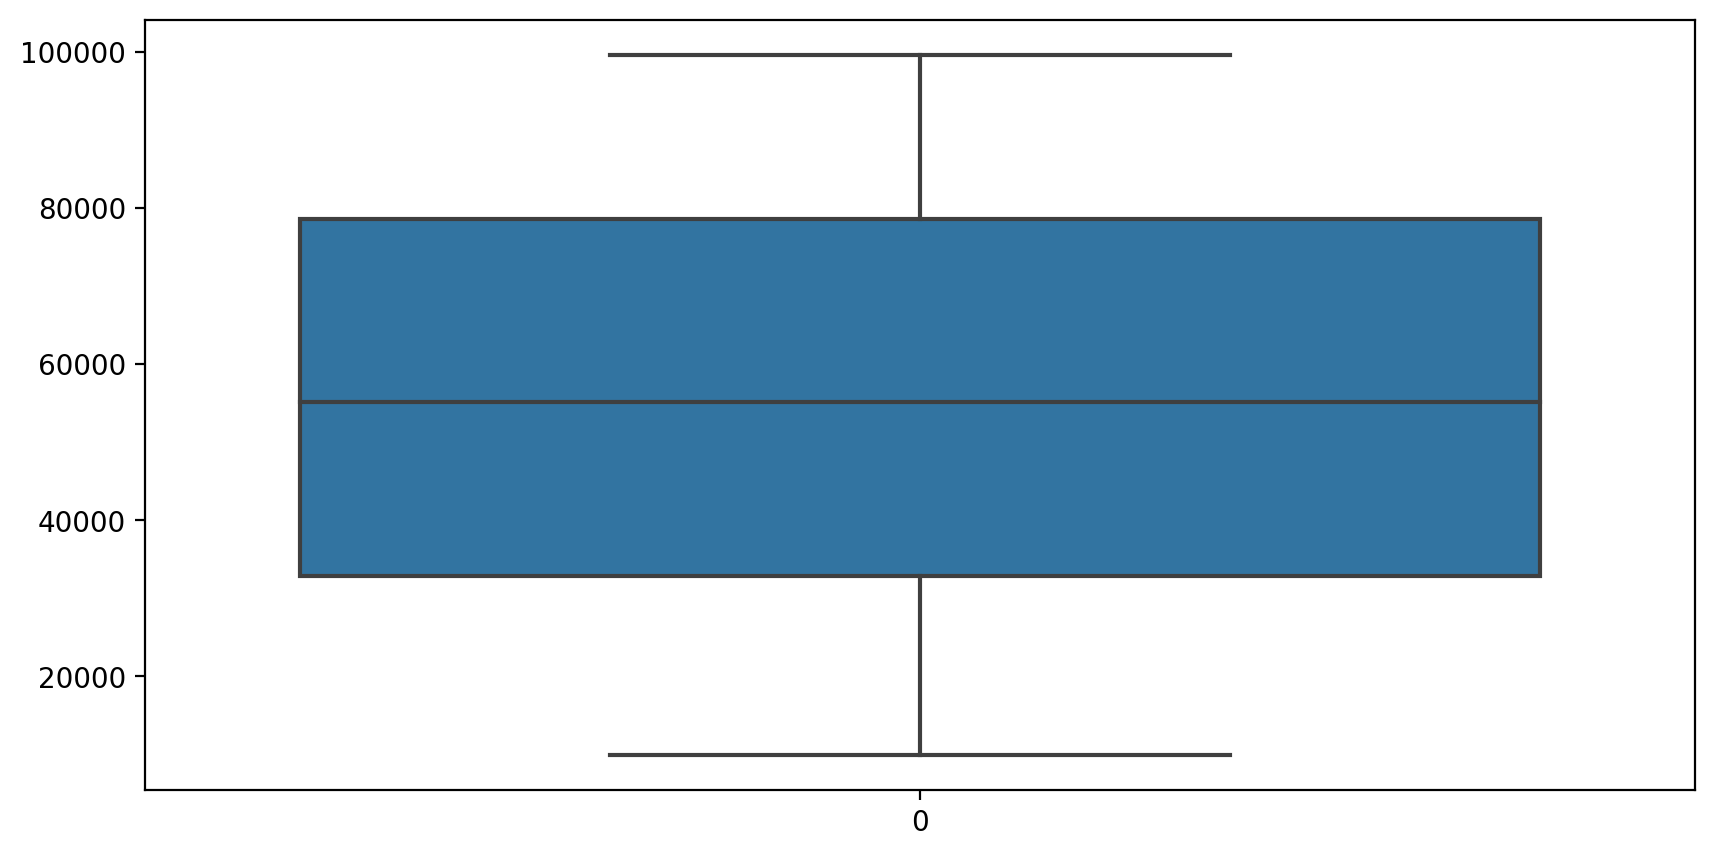

In [9]:
sns.boxplot(df['Taxable.Income'])

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


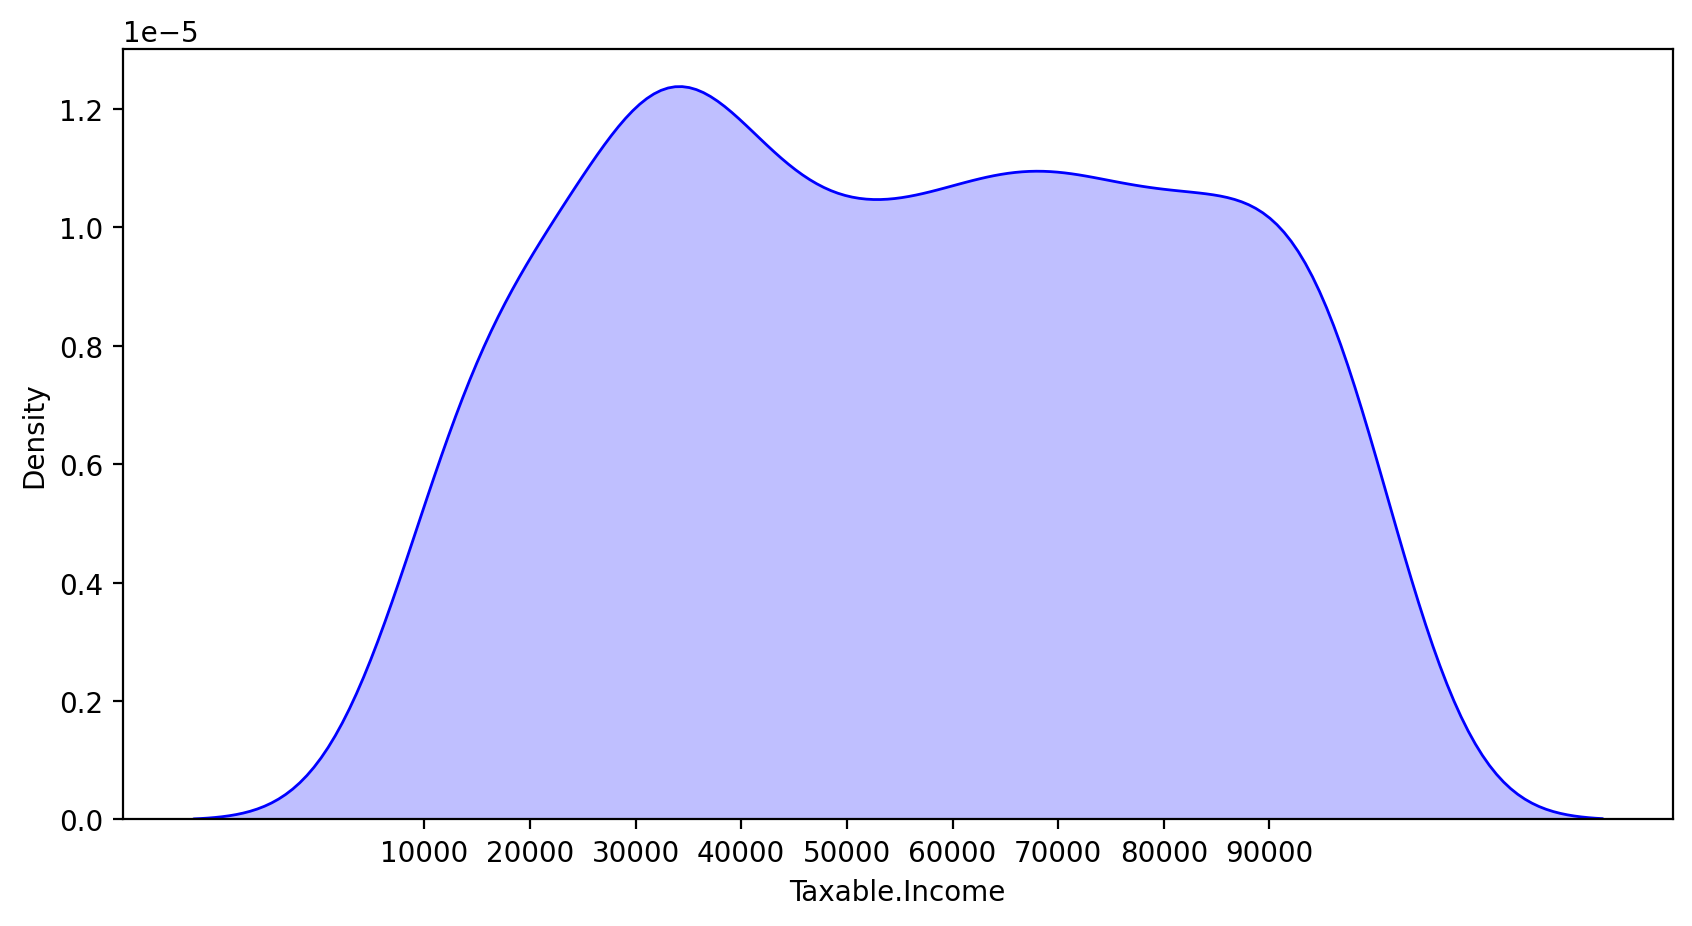

In [10]:
print("Skew: {}".format(df['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df['Taxable.Income'].kurtosis()))
sns.kdeplot(df['Taxable.Income'],shade=True,color='b')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

In [11]:
obj_colum = df.select_dtypes(include='object').columns.tolist()

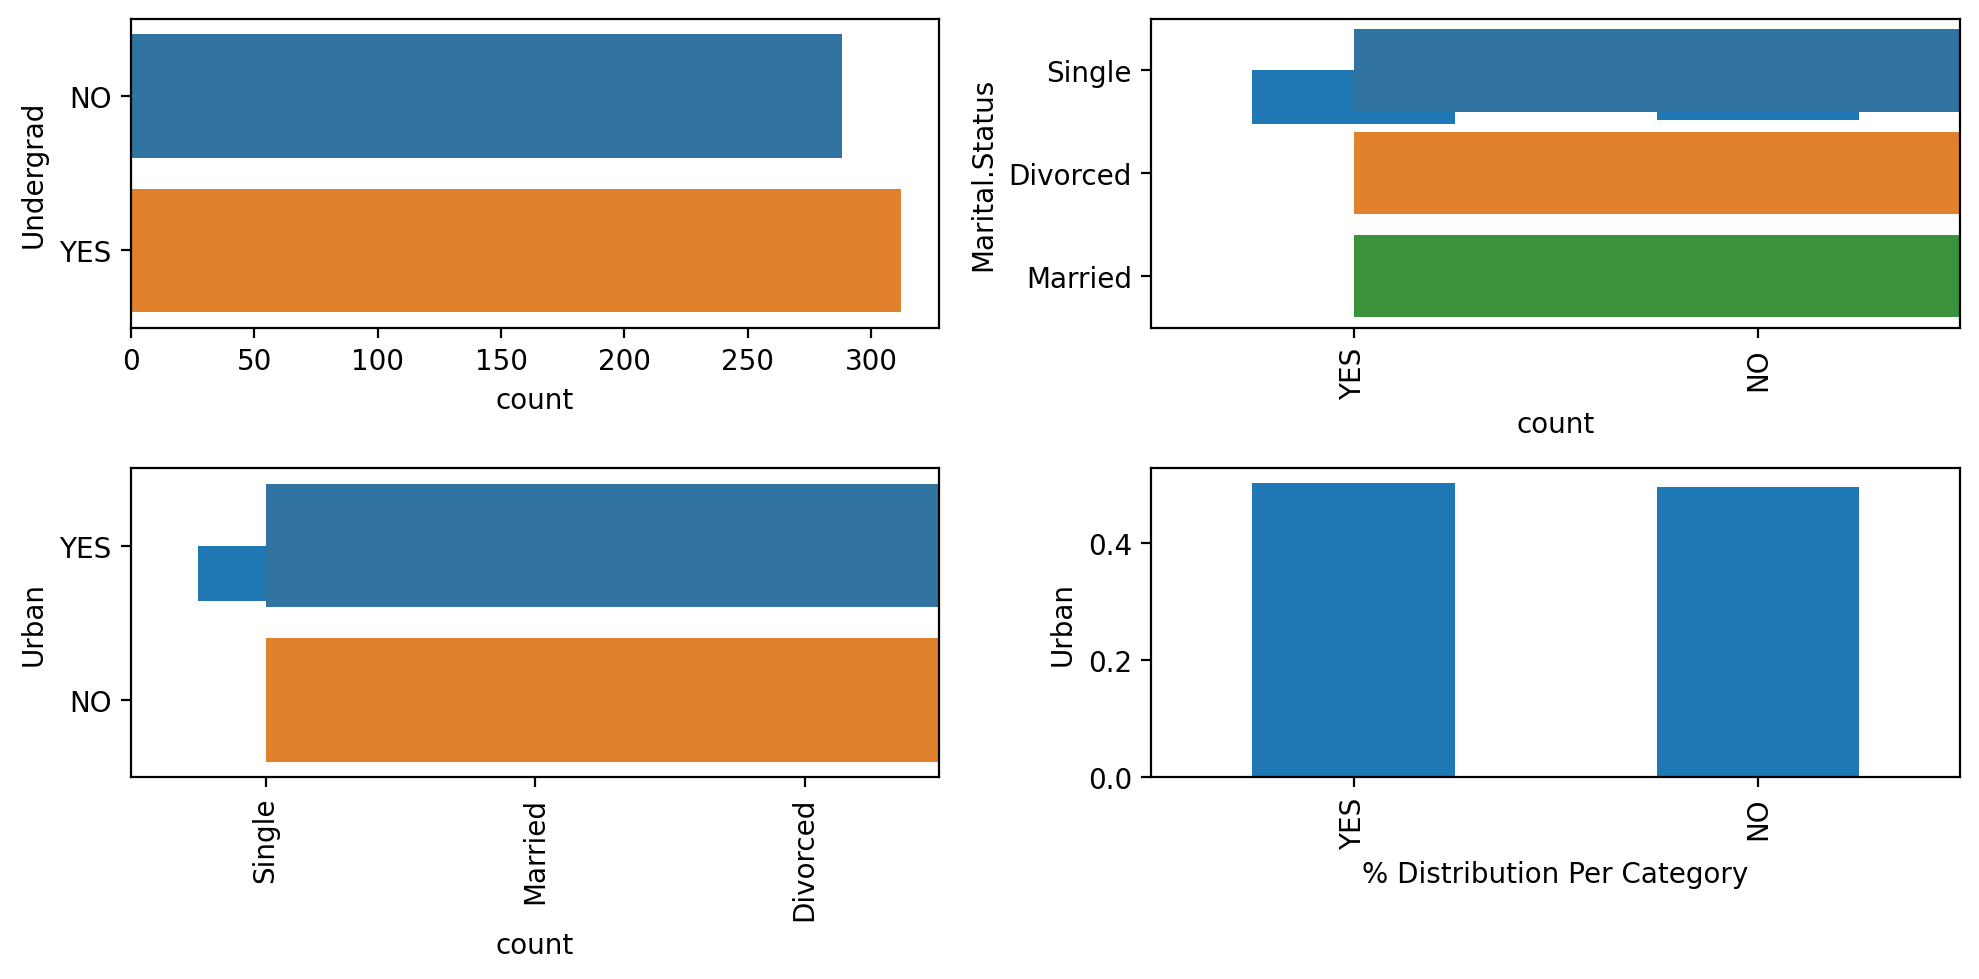

In [12]:
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% Distribution Per Category')
plt.tight_layout()
plt.show()  

In [13]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

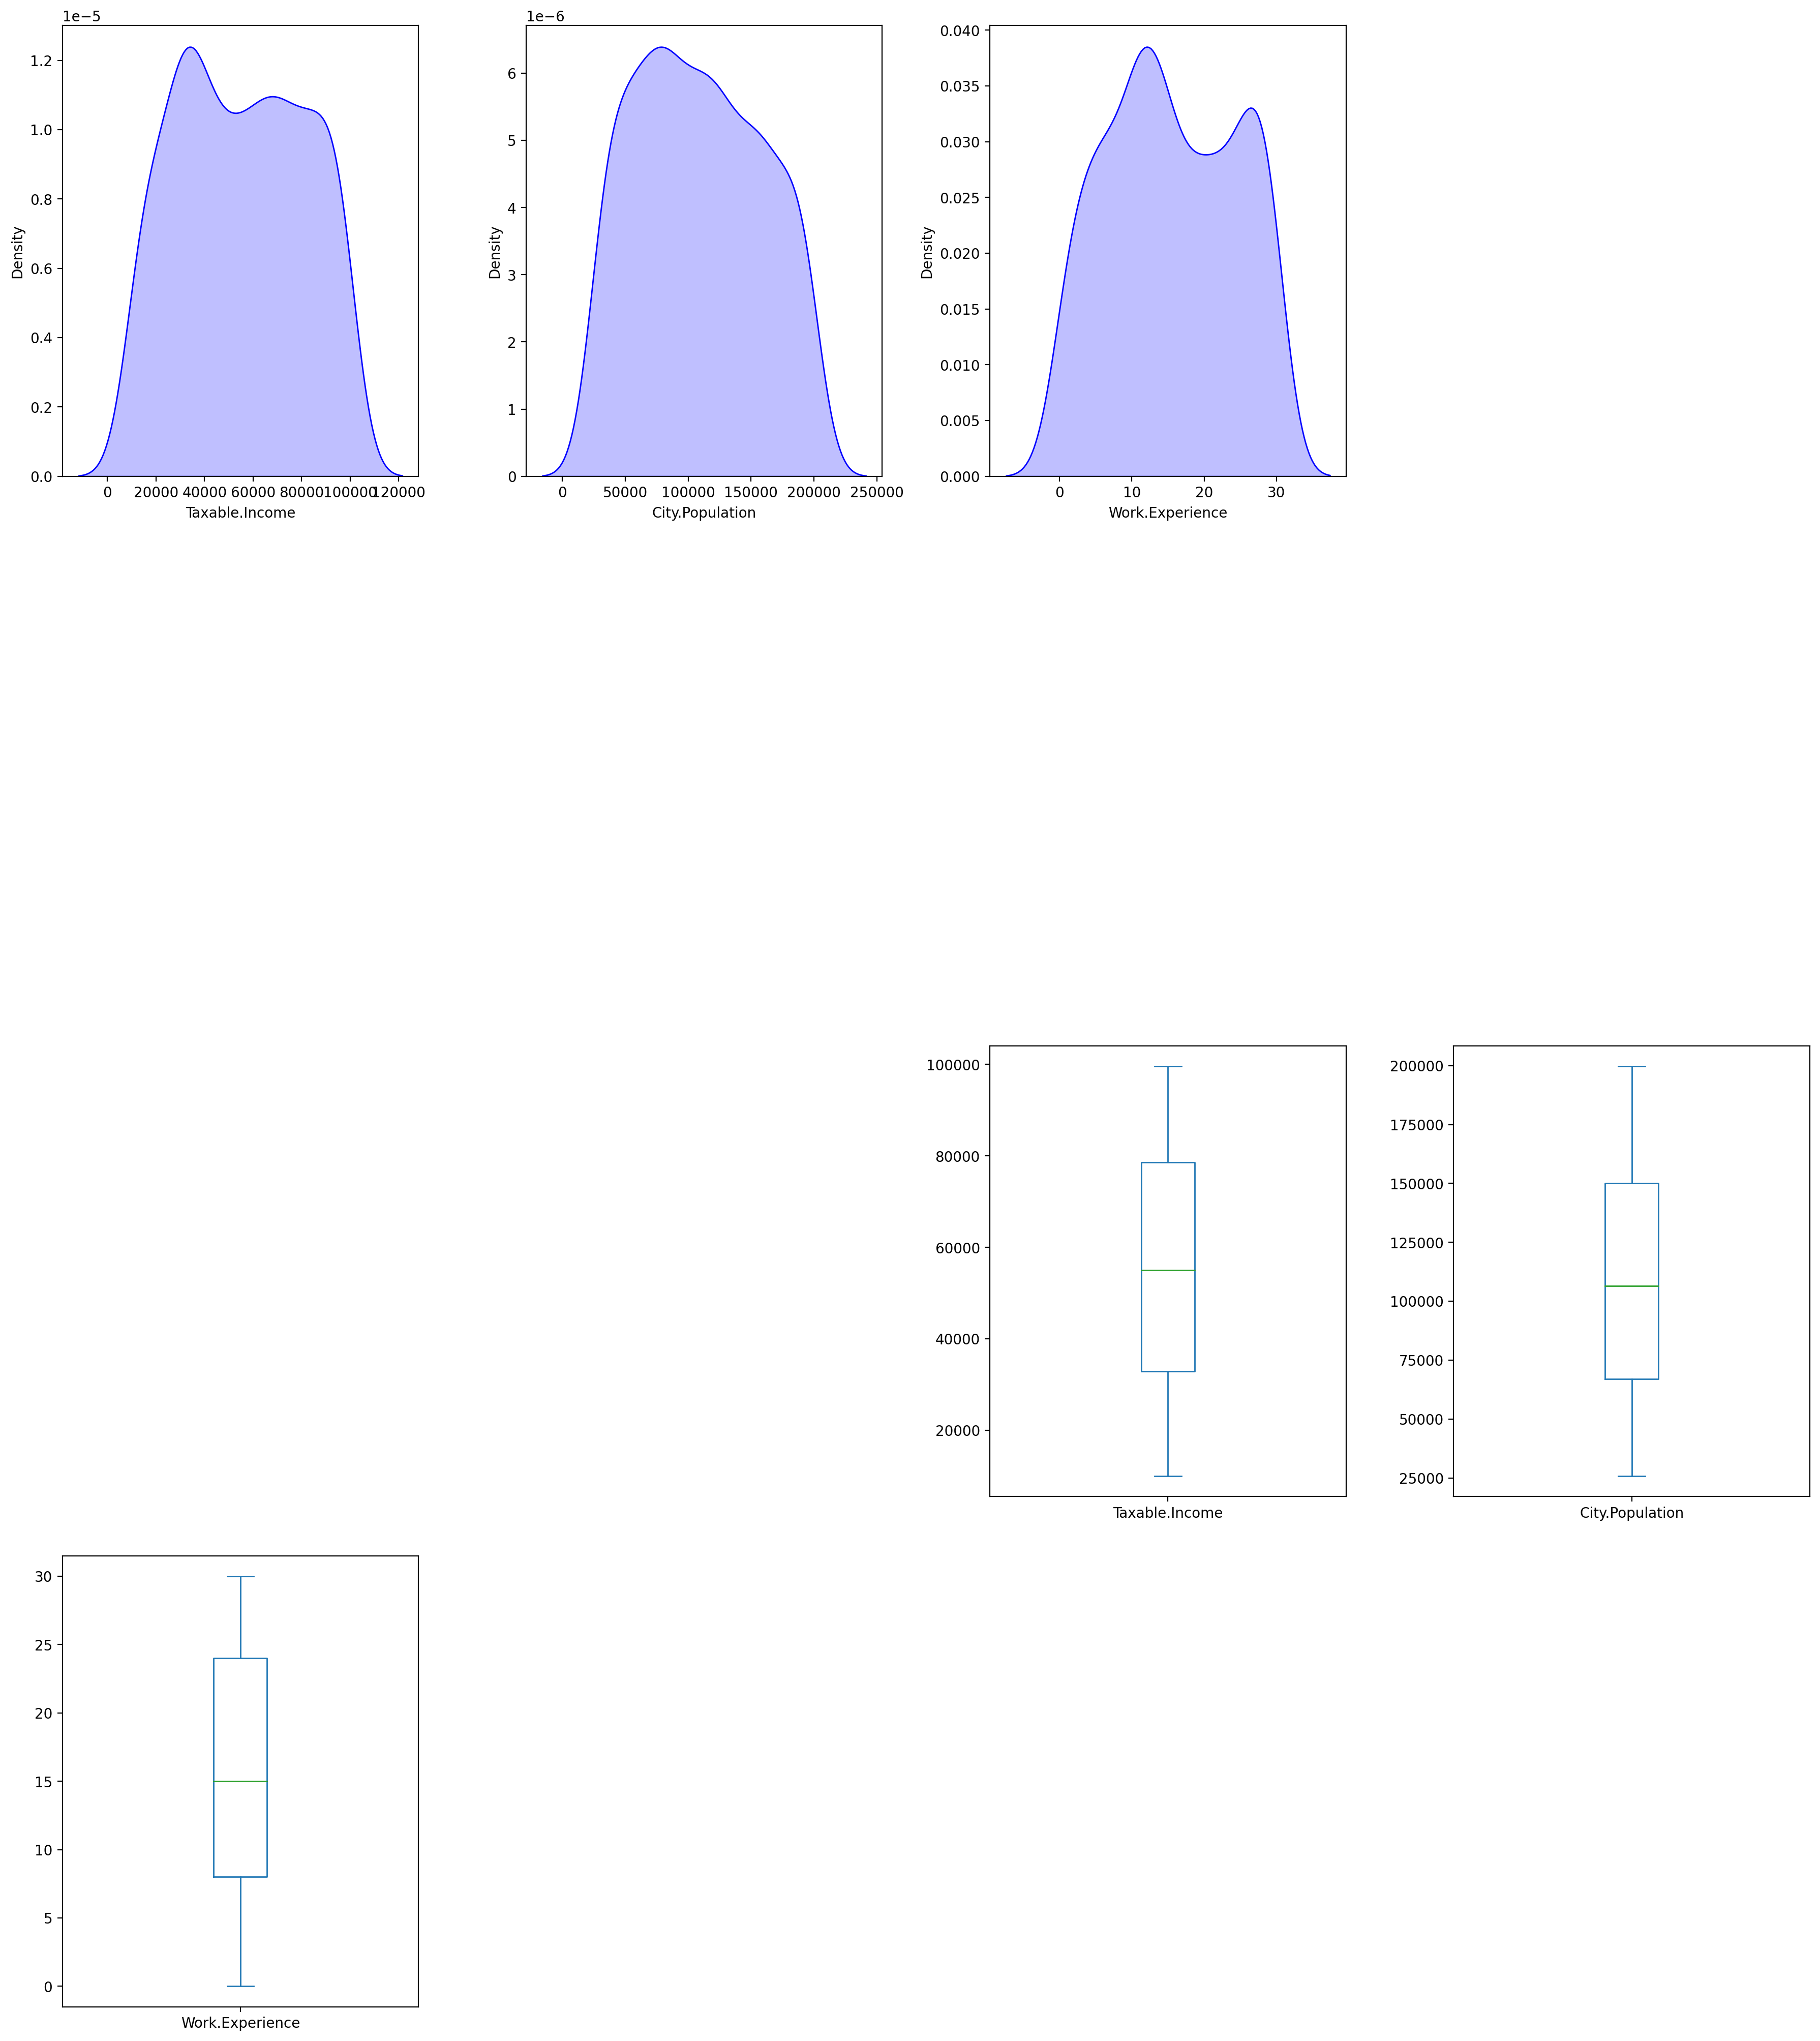

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [15]:
df = pd.get_dummies(df, columns = ['Undergrad','Marital.Status','Urban'])

<Axes: >

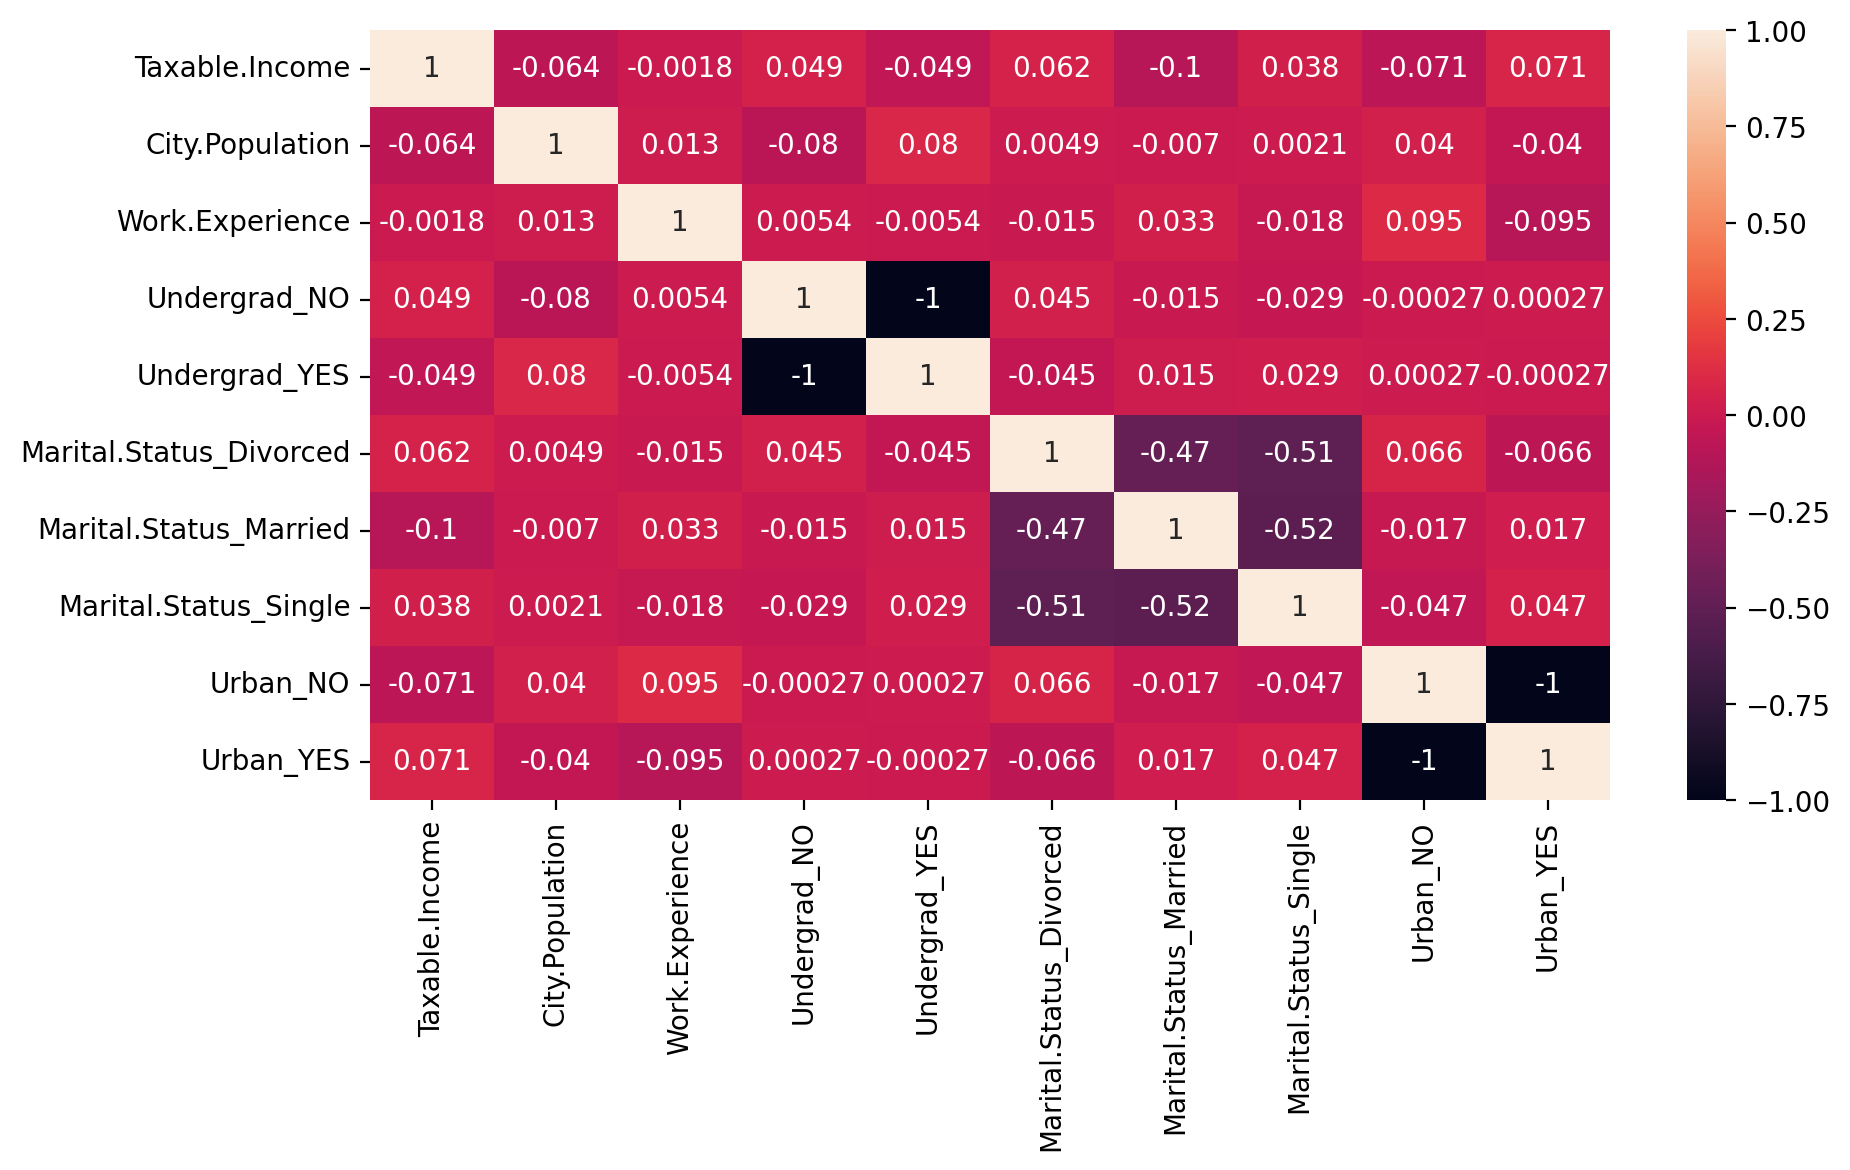

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
# Random Forest Model 

In [18]:
df['Taxable.Income']=pd.cut(df['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [19]:
list(df.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [20]:
X = df.iloc[:,1:10]
y = df.iloc[:,0]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [22]:
y_train.value_counts()

good     378
risky    102
Name: Taxable.Income, dtype: int64

In [23]:
model = RandomForestClassifier(n_estimators=110, max_features=3)

In [24]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

In [25]:
pred_train = model.predict(x_train)

In [26]:
accuracy_score(y_train,pred_train)

1.0

In [27]:
# Test Data Model Prediction

In [28]:
y_pred=model.predict(x_test)

In [29]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7583333333333333


In [30]:
model.score(x_test, y_test)

0.7583333333333333

In [31]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

City.Population            0.521625
Work.Experience            0.355378
Marital.Status_Married     0.020583
Marital.Status_Divorced    0.018653
Marital.Status_Single      0.017712
Undergrad_NO               0.017486
Urban_NO                   0.016740
Undergrad_YES              0.016335
Urban_YES                  0.015489
dtype: float64

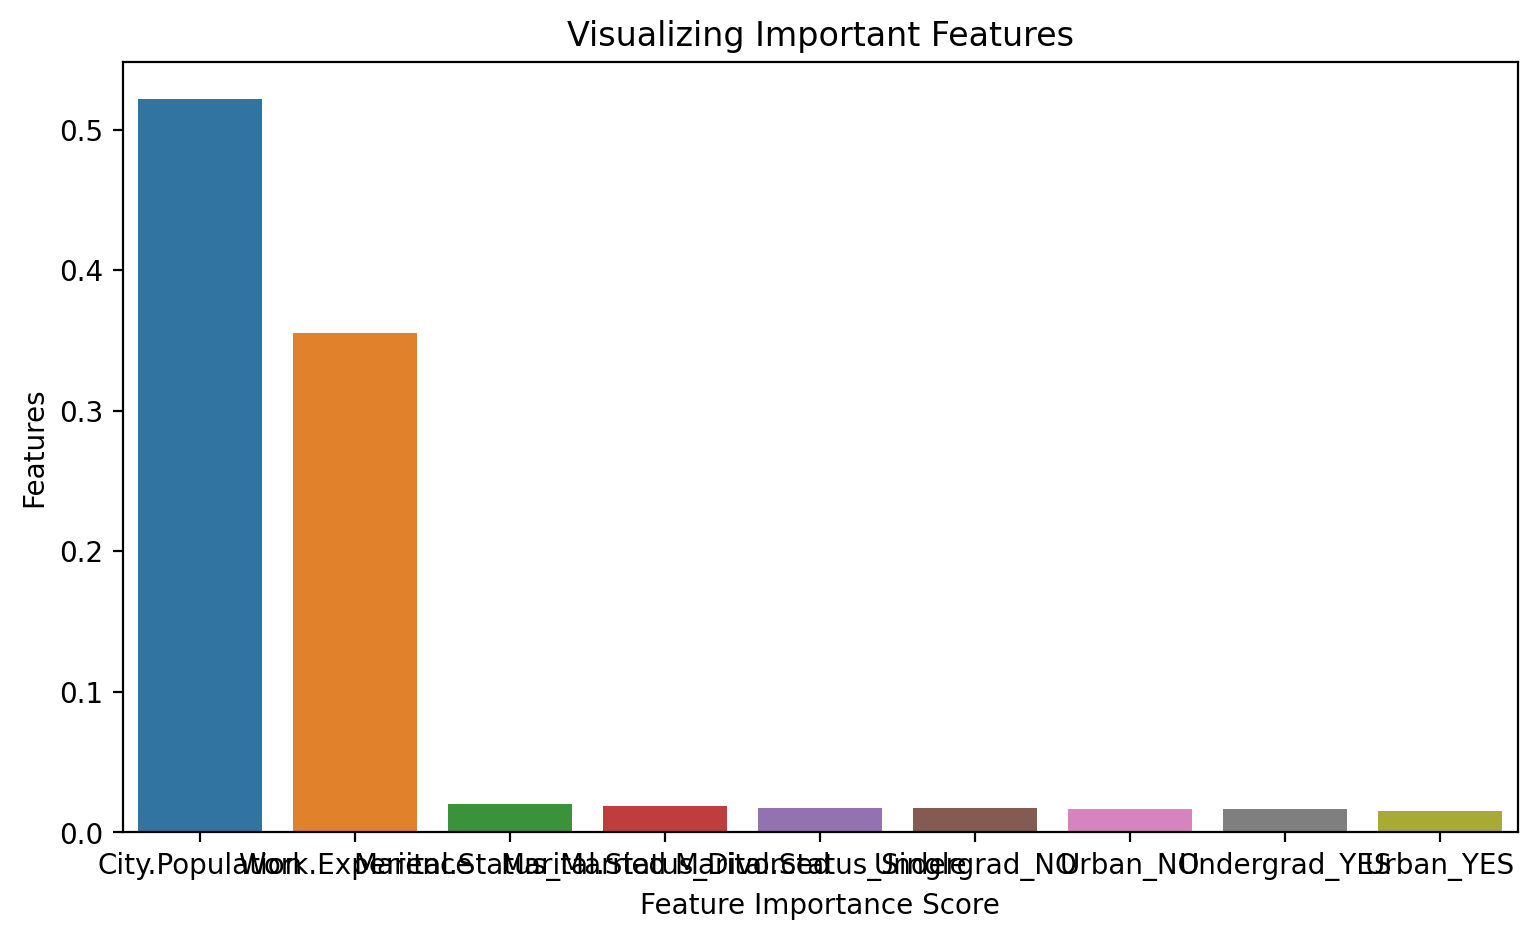

In [32]:
plt.figure(figsize=(9,5))
sns.barplot(y=feature_imp, x=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [33]:
# checking model with different maximum features using loop function

In [34]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [35]:
# Train and Test accuracy

In [36]:
Test = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
Test

,max_features,train_acc,test_acc
0,1,1.0,0.750000
1,2,1.0,0.750000
2,3,1.0,0.758333
3,4,1.0,0.766667
4,5,1.0,0.758333
5,6,1.0,0.758333
6,7,1.0,0.758333
7,8,1.0,0.750000
8,9,1.0,0.750000


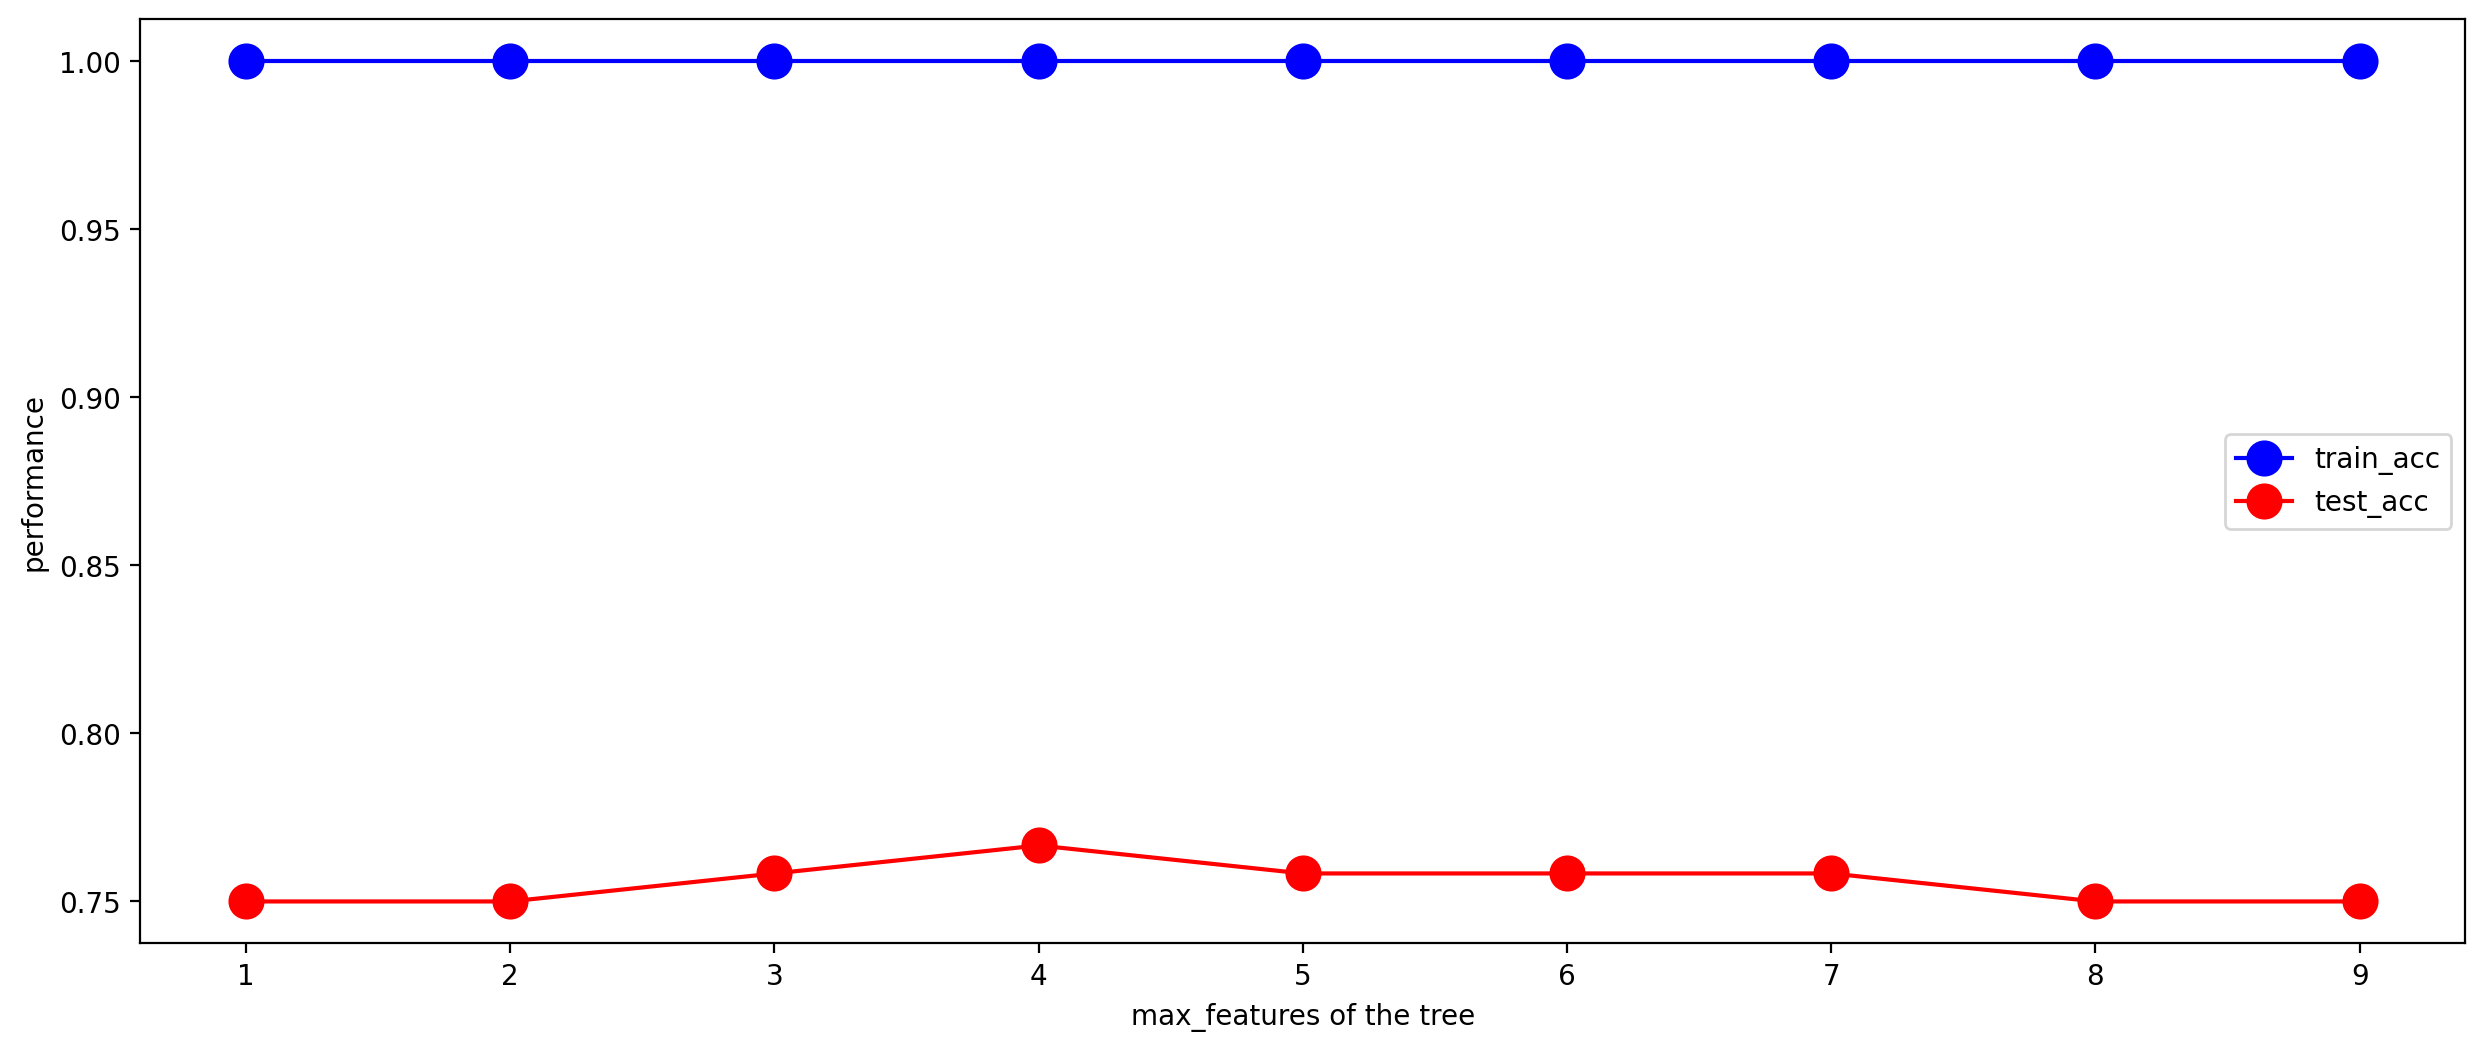

In [37]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(Test['max_features'],Test['train_acc'], marker = 'o',markersize=12,color='blue')
plt.plot(Test['max_features'],Test['test_acc'], marker = 'o',markersize=12, color='red')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[90,  8],
       [21,  1]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.75')

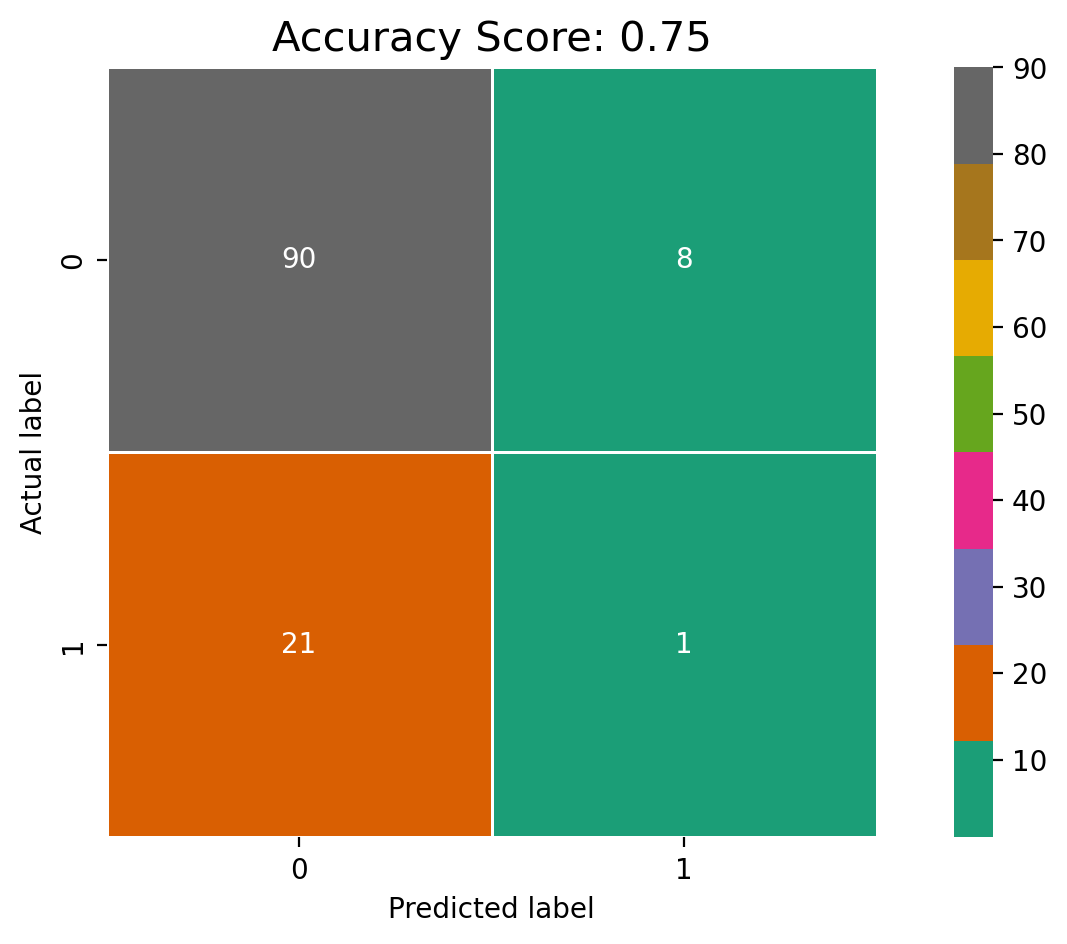

In [40]:
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,cmap='Dark2')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [41]:
# Test data classification report

In [42]:
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

        good       0.81      0.91      0.86        98
       risky       0.10      0.05      0.06        22

    accuracy                           0.75       120
   macro avg       0.45      0.48      0.46       120
weighted avg       0.68      0.75      0.71       120



In [43]:
model.fit(x_train,y_train)
print("accuracy:",model.score(x_train, y_train))

accuracy: 1.0


In [44]:
y_pred=model.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7583333333333333


In [45]:
Test

,max_features,train_acc,test_acc
0,1,1.0,0.750000
1,2,1.0,0.750000
2,3,1.0,0.758333
3,4,1.0,0.766667
4,5,1.0,0.758333
5,6,1.0,0.758333
6,7,1.0,0.758333
7,8,1.0,0.750000
8,9,1.0,0.750000


# Conclusion
The accuracy of the Training data is 100% and the accurancy on the test data is 70.83%